### Oppgave 3d: Implementere Eulers metode

Løs Lane-Emden numerisk for n = 1, og sammenlign med den analytiske løsningen.

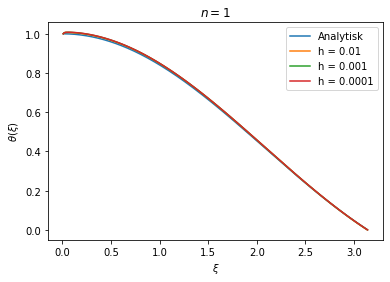

In [187]:
import numpy as np
import matplotlib.pyplot as plt

def step_euler(y,t, h, f, n):
    ''' Performs one step of Euler's method. '''
    return y + h*f(y,t, n)

def step_RK4(y,t, h, f, n):
    ''' Calculates all k's and takes on RK4-step '''
    k1 = f(y,t, n)
    k2 = f(y + h*k1/2, t+h/2, n)
    k3 = f(y+h*k2/2, t+h/2, n)
    k4 = f(y+h*k3, t+h, n)
    return y + (h/6)*(k1+2*k2+2*k3+k4)

def full_numerical_method(h, n, method="euler", y_0 = 1, start_t = 0.01, end_t = 3, f = lane_emden):
    ''' Performs all steps in selected method. Made one general function for both Euler and RK4 '''
    try:
        t_list = np.zeros(1)
        y_list = np.zeros((1,2))
        t_list[0] = start_t
        y_list[0] = y_0
        i = 0
        next_value = step_RK4(y_list[i], t_list[i], h, f, n)
        if method == "euler":
            while next_value[0] > 0:
                t_list = np.append(t_list, t_list[i]+h)
                y_list = np.vstack((y_list, next_value))
                y_list[i+1] = next_value
                i+=1
                next_value = step_euler(y_list[i], t_list[i], h, f, n)
        elif method == "RK4":
            while next_value[0] > 0:
                t_list = np.append(t_list, t_list[i]+h)
                y_list = np.vstack((y_list, next_value))
                y_list[i+1] = next_value
                i+=1
                next_value = step_RK4(y_list[i], t_list[i], h, f, n)
        return t_list, y_list
    except:
        return t_list, y_list

def lane_emden_analytical(t):
    return np.sin(t)/t

def lane_emden(y, t, n):
    assert(y[0]>0) #this exception is caught so that no runtimeerrors are casted! (when n=3/2 runtimeerror, since it does not work on negative numbers)
    return np.array([y[1], -y[0]**(n)-2*y[1]/t])

def simple_plot(t, y, h, n, anal=False, savefig=False, filename="simple_plot.pdf"):
    ''' Simple plot for these tasks. 
    anal = False (default) does not plot the analytical function, True does. 
    savefig = False (default) does not save plot to PDF. True saves to default filename ""simple_plot.pdf"
    n = given as the value you want to use, not the list n.
    '''
    if anal == True:
        plt.plot(t[0], lane_emden_analytical(t[0]), label="Analytisk")
    for i in range(len(h)):
        plt.plot(t[i], y[i][:,0], label="h = "+str(h[i]))
    plt.xlabel(r'$\xi$')
    plt.ylabel(r'$\theta(\xi)$')
    plt.title(r'$n = '+str(n)+'$')
    plt.legend()
    if savefig == True:
        plt.savefig(filename, bbox_inches='tight')
    plt.show()
    
def get_values(h, n, method="euler", y_0 = 1, start_t = 0.01, end_t = 3, f = lane_emden):
    ''' made to get rid of some repetitiveness in gettin values from full_numerical_method for every value of h '''
    list_of_t_lists = []
    list_of_y_lists = []
    for i in range(len(h)):
        t_list, y_list = full_numerical_method(h[i], n, method="euler", y_0 = 1, start_t = 0.01, end_t = 3, f = lane_emden)
        list_of_t_lists.append(t_list)
        list_of_y_lists.append(y_list)
    return list_of_t_lists, list_of_y_lists

h = [0.01, 0.001, 0.0001]
n = [1, 3/2, 3]

list_of_t_lists, list_of_y_lists = get_values(h, n[0])
simple_plot(list_of_t_lists, list_of_y_lists, h, n[0], True)


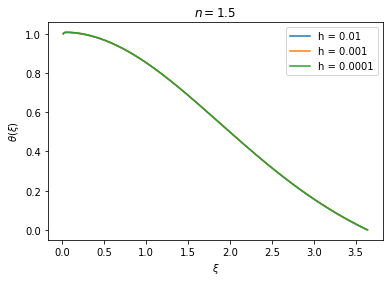

ξ_N = 3.6299999999999666 h = 0.01, n = 1.5
ξ_N²|θ'(ξ_N)|= 2.7451532187644743 h = 0.01, n = 1.5

ξ_N = 3.6439999999997097 h = 0.001, n = 1.5
ξ_N²|θ'(ξ_N)|= 2.734577430964422 h = 0.001, n = 1.5

ξ_N = 3.644700000003267 h = 0.0001, n = 1.5
ξ_N²|θ'(ξ_N)|= 2.734655069963891 h = 0.0001, n = 1.5



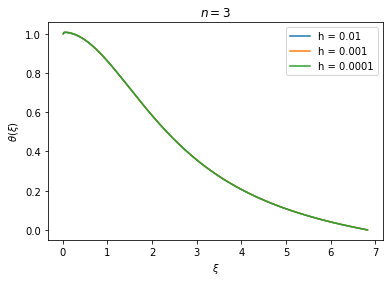

ξ_N = 6.819999999999899 h = 0.01, n = 3
ξ_N²|θ'(ξ_N)|= 2.0116443456852484 h = 0.01, n = 3

ξ_N = 6.831000000000616 h = 0.001, n = 3
ξ_N²|θ'(ξ_N)|= 2.0178314669803368 h = 0.001, n = 3

ξ_N = 6.828199999997425 h = 0.0001, n = 3
ξ_N²|θ'(ξ_N)|= 2.0185026952185328 h = 0.0001, n = 3



In [188]:
#task 3e)
#Solved in non-relativistic and ultra-relativistic cases!
#RK4 should not be used here! Here only Euler should be used!

def print_values(list_of_t_lists, list_of_y_lists, h, n):
    ''' n is supplied not as a list, but as the n that should be displayed'''
    for i in range(len(h)):
        print('ξ_N =',list_of_t_lists[i][-1], "h = "+str(h[i])+", n = "+str(n))
        print("ξ_N²|θ'(ξ_N)|=", list_of_t_lists[i][-1]**2*np.abs((list_of_y_lists[i][:,0][-1]-list_of_y_lists[i][:,0][-2])/h[i]), "h = "+str(h[i])+", n = "+str(n))
        print()
        
#Utskriften viser at det siste punktet muligens ikke kommer med? (siden Ksi_N som er oppgitt ikke treffes her. )
#Noe jeg kanskje skal sjekke?
#Koden i colab får det til ser jeg!
        
        
list_of_t_lists_euler_non, list_of_y_lists_euler_non = get_values(h, n[1])
simple_plot(list_of_t_lists_euler_non, list_of_y_lists_euler_non, h, n[1])
print_values(list_of_t_lists_euler_non, list_of_y_lists_euler_non, h, n[1])

list_of_t_lists_euler_ultra, list_of_y_lists_euler_ultra = get_values(h, n[2])
simple_plot(list_of_t_lists_euler_ultra, list_of_y_lists_euler_ultra, h, n[2])
print_values(list_of_t_lists_euler_ultra, list_of_y_lists_euler_ultra, h, n[2])


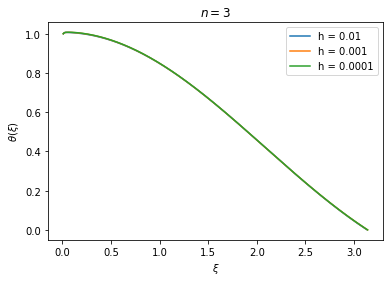

In [190]:
#task 3f)
#same as 3d when it comes to plotting. 

list_of_t_lists_kutta, list_of_y_lists_kutta = get_values(h, n[0], "RK4")
simple_plot(list_of_t_lists_kutta, list_of_y_lists_kutta, h, n[2])

In [93]:
#3g)
#Plot the global error from both methods as a function of h
#Need to find the solutions for continuous h-values for both RK4 and Euler.

def fixed_full_euler_or_RK4(h, f, n, method="euler", y_0 = 1, start_t = 0.01, end_t = 3):
    ''' Performs all steps in RK4 or Euler, this time all the way to end_t. '''
    N = int((end_t - start_t)/h) 
    t_list = np.linspace(start_t, end_t, N+1) 
    y_list = np.zeros((N+1,2))
    t_list[0] = start_t
    y_list[0] = y_0
    for i in range(N):
        if method == "euler":
            next_value = step_euler(y_list[i], t_list[i], h, f, n)
            if next_value[0] == 0:
                y_list[i+1] = 0
            else: 
                y_list[i+1] = next_value
        elif method == "RK4":
            next_value = step_RK4(y_list[i], t_list[i], h, f, n)
            if next_value[0] == 0:
                y_list[i+1] = 0
            else: 
                y_list[i+1] = next_value
    return t_list, y_list

def global_error(theta_list):
    ''' Finds global error of one theta, which depends on the h-value used to solve the equation '''
    return np.abs(theta_list[-1])
    #return np.full(len(h_values),np.abs(y_list[:,0][-1]))

def global_error_vs_h_values(h_values, f, n, method="euler", y_0 = 1, start_t = 0.01, end_t = 3):
    ''' 
    Takes y-list from method and h-values. 
    Returns numpy array of global_error that later may be plotted against h (in correct dimensions)
    '''
    global_error_list = np.zeros(len(h_values))
    for i in range(len(h_values)):
        t_list, y_list = fixed_full_euler_or_RK4(h_values[i], f, n, method, y_0, start_t, end_t)
        theta_list = y_list[:,0]
        global_error_list[i] = global_error(theta_list)
    return global_error_list
    
    
def cont_solutions(h_list, f, n, method="euler", y_0 = 1, start_t = 0.01, end_t = 3):
    
    ''' 
    Finds solutions for supplied method and returns y_lists and h_values
    '''
    list_of_t_lists = np.zeros(len(h_list))
    list_of_y_lists = np.zeros(len(h_list))
    for i in range(len(h_list)):
        if method == "euler":
            t_list, y_list = full_RK4(h_list[i], f, n, y_0, start_t, end_t)
        elif method == "RK4": 
            t_list, y_list = full_euler(h_list[i], f, n, y_0, start_t, end_t)
        print(i)
        list_of_t_lists[i] = t_list
        list_of_y_lists[i] = y_list
    return list_of_t_lists, list_of_y_lists
        

def plot_y_vs_h(y_list, h_values, title, label=r'$|\theta_N|$', xlabel=r'h', ylabel=r'$|\theta_N|$'):
    plt.plot(h_values, y_list, label=label)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xscale('log')
    plt.legend()
    plt.show()
    
    
h_values = np.linspace(1e-4,0.1, 100) #E.g. 
h_values_log = np.logspace(-4,0,100) #Try with log-scale too.
n = [3/2, 3]
ksiN = [3.65375, 6.89685]

'''
global_errorsE1 = global_error_vs_h_values(h_values, lane_emden, n[0], "euler", 1, 1, ksiN[0])
global_errorsE2 = global_error_vs_h_values(h_values, lane_emden, n[1], "euler", 1, 0.1, ksiN[1])
plot_y_vs_h(global_errorsE1, h_values, r'Euler, $n='+str(n[0])+'$')
plot_y_vs_h(global_errorsE2, h_values, r'Euler, $n='+str(n[1])+'$')

global_errorsKutta1 = global_error_vs_h_values(h_values, lane_emden, n[0], "RK4", 1, 1, ksiN[0])
global_errorsKutta2 = global_error_vs_h_values(h_values, lane_emden, n[1], "RK4", 1, 0.1, ksiN[1])
plot_y_vs_h(global_errorsKutta1, h_values, r'RK4, $n='+str(n[0])+'$')
plot_y_vs_h(global_errorsKutta2, h_values, r'RK4, $n='+str(n[1])+'$')

global_errorsELog1 = global_error_vs_h_values(h_values_log, lane_emden, n[0], "euler", 1, 1, ksiN[0])
global_errorsELog2 = global_error_vs_h_values(h_values_log, lane_emden, n[1], "euler", 1, 1, ksiN[1])
plot_y_vs_h(global_errorsELog1, h_values, r'Log Euler, $n='+str(n[0])+'$')
plot_y_vs_h(global_errorsELog2, h_values, r'Log Euler, $n='+str(n[1])+'$')

global_errorsKuttaLog1 = global_error_vs_h_values(h_values_log, lane_emden, n[0], "RK4", 1, 1, ksiN[0])
global_errorsKuttaLog2 = global_error_vs_h_values(h_values_log, lane_emden, n[1], "RK4", 1, 1, ksiN[1])
plot_y_vs_h(global_errorsKuttaLog1, h_values, r'Log RK4, $n='+str(n[0])+'$')
plot_y_vs_h(global_errorsKuttaLog2, h_values, r'Log RK4, $n='+str(n[1])+'$')
'''

'\nglobal_errorsE1 = global_error_vs_h_values(h_values, lane_emden, n[0], "euler", 1, 1, ksiN[0])\nglobal_errorsE2 = global_error_vs_h_values(h_values, lane_emden, n[1], "euler", 1, 0.1, ksiN[1])\nplot_y_vs_h(global_errorsE1, h_values, r\'Euler, $n=\'+str(n[0])+\'$\')\nplot_y_vs_h(global_errorsE2, h_values, r\'Euler, $n=\'+str(n[1])+\'$\')\n\nglobal_errorsKutta1 = global_error_vs_h_values(h_values, lane_emden, n[0], "RK4", 1, 1, ksiN[0])\nglobal_errorsKutta2 = global_error_vs_h_values(h_values, lane_emden, n[1], "RK4", 1, 0.1, ksiN[1])\nplot_y_vs_h(global_errorsKutta1, h_values, r\'RK4, $n=\'+str(n[0])+\'$\')\nplot_y_vs_h(global_errorsKutta2, h_values, r\'RK4, $n=\'+str(n[1])+\'$\')\n\nglobal_errorsELog1 = global_error_vs_h_values(h_values_log, lane_emden, n[0], "euler", 1, 1, ksiN[0])\nglobal_errorsELog2 = global_error_vs_h_values(h_values_log, lane_emden, n[1], "euler", 1, 1, ksiN[1])\nplot_y_vs_h(global_errorsELog1, h_values, r\'Log Euler, $n=\'+str(n[0])+\'$\')\nplot_y_vs_h(global_

In [ ]:
#Oppgave 3i)

alpha_values = [0.86, 0.59, 0.0167]